In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import numpy as np
import pandas as pd

tweets = []
with open('trainingdata-all-annotations.txt','r', encoding = 'iso-8859-1') as f:
    while True:
        line = f.readline()
        if not line:
            break
        tweets.append(line.split('\t'))
        
mat = np.array(tweets)
mat = np.delete(mat, 0, axis=0)

df_training = pd.DataFrame(mat, columns = ['ID','Target','Tweet','Stance','Opinion towards', 'Sentiment'])
df_training = df_training.drop(['ID','Opinion towards', 'Sentiment'], axis=1)

print(df_training)

                        Target  \
0                      Atheism   
1                      Atheism   
2                      Atheism   
3                      Atheism   
4                      Atheism   
...                        ...   
2809  Legalization of Abortion   
2810  Legalization of Abortion   
2811  Legalization of Abortion   
2812  Legalization of Abortion   
2813  Legalization of Abortion   

                                                  Tweet   Stance  
0     dear lord thank u for all of ur blessings forg...  AGAINST  
1     Blessed are the peacemakers, for they shall be...  AGAINST  
2     I am not conformed to this world. I am transfo...  AGAINST  
3     Salah should be prayed with #focus and #unders...  AGAINST  
4     And stay in your houses and do not display you...  AGAINST  
...                                                 ...      ...  
2809  There's a law protecting unborn eagles, but no...  AGAINST  
2810  I am 1 in 3... I have had an abortion #Abortio...

In [3]:
tweets = []
with open('additional-tweets.txt','r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        tweets.append(line.split('\t'))
        
mat = np.array(tweets)
mat = np.delete(mat, 0, axis=0)

df_testing = pd.DataFrame(mat, columns = ['Target','Tweet','Stance'])

df_testing['Stance'] = [word[:-1] for word in df_testing['Stance']]

print(df_testing)

                              Target  \
0   Climate Change is a Real Concern   
1   Climate Change is a Real Concern   
2   Climate Change is a Real Concern   
3   Climate Change is a Real Concern   
4   Climate Change is a Real Concern   
..                               ...   
57                 Feminist Movement   
58                 Feminist Movement   
59                 Feminist Movement   
60                 Feminist Movement   
61                 Feminist Movement   

                                                Tweet   Stance  
0   "Your CARBON FOOTPRINT will now be used to CON...  AGAINST  
1   We may reach a 1.5°C world in as little as 5 y...    FAVOR  
2   "Indeed, it is a ""genocidal narrative"" to bl...  AGAINST  
3   "Remember - the wildfires, the droughts, the h...    FAVOR  
4   The NYC mayor Adams has declared war on meat b...  AGAINST  
..                                                ...      ...  
57  “I love myself when I am laughing. . . and the...    FAVOR  

In [4]:
print(df_testing['Stance'])

0     AGAINST
1       FAVOR
2     AGAINST
3       FAVOR
4     AGAINST
       ...   
57      FAVOR
58      FAVOR
59      FAVOR
60    AGAINST
61      FAVOR
Name: Stance, Length: 62, dtype: object


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

le1.fit(df_training['Stance'])
df_training['Stance'] = le1.transform(df_training['Stance'])
df_testing['Stance'] = le1.transform(df_testing['Stance'])

le2.fit(df_training['Target'])
df_training['Target'] = le2.transform(df_training['Target'])
df_testing['Target'] = le2.transform(df_testing['Target'])
print(len(df_training['Target']))

df_training.head()

2814


,Target,Tweet,Stance
0,0,dear lord thank u for all of ur blessings forg...,0
1,0,"Blessed are the peacemakers, for they shall be...",0
2,0,I am not conformed to this world. I am transfo...,0
3,0,Salah should be prayed with #focus and #unders...,0
4,0,And stay in your houses and do not display you...,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

cols_to_norm = ['Target']
df_training[cols_to_norm] = MinMaxScaler().fit_transform(df_training[cols_to_norm])
df_testing[cols_to_norm] = MinMaxScaler().fit_transform(df_testing[cols_to_norm])

In [7]:
from nltk.stem.porter import PorterStemmer
import re

porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [8]:
unique_words = set();
for string in df_training['Tweet']:
    words = stemming_tokenizer(string)
    unique_words.update(words)
for string in df_testing['Tweet']:
    words = stemming_tokenizer(string)
    unique_words.update(words)
print(len(unique_words))

7760


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer( stop_words = 'english', tokenizer=stemming_tokenizer, vocabulary=unique_words)

# Compute the TF-IDF matrix
training_tfidf = vectorizer.fit_transform(df_training['Tweet'])
testing_tfidf = vectorizer.fit_transform(df_testing['Tweet'])

X_train = pd.DataFrame(training_tfidf.toarray(), columns=vectorizer.get_feature_names())
X_train['Target'] = df_training['Target']
X_train.head()

/Users/caryslekander/opt/anaconda3/envs/python38env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', '

,-,--,--isaiah,--ronald,-2,-babi,-blais,-but,-care,-galatian,...,zerlinamaxwel,zero,zerofootprint,zip,zmanoj,zoe,zombieneith,zora,zubair,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_test = pd.DataFrame(testing_tfidf.toarray(), columns=vectorizer.get_feature_names())
X_test['Target'] = df_testing['Target']
X_test.head()

,-,--,--isaiah,--ronald,-2,-babi,-blais,-but,-care,-galatian,...,zerlinamaxwel,zero,zerofootprint,zip,zmanoj,zoe,zombieneith,zora,zubair,Target
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.172256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [11]:
y_train = df_training.Stance.astype(np.int32)
y_test = df_testing.Stance.astype(np.int32)

In [12]:
def print_results(results):
    correct_favor = len(results[(results['Actual Stance']=='FAVOR') & (results['Predicted Stance']=='FAVOR')])
    favor_perct = correct_favor / len(results[(results['Actual Stance']=='FAVOR')])
    correct_against = len(results[(results['Actual Stance']=='AGAINST') & (results['Predicted Stance']=='AGAINST')])
    against_perct = correct_against / len(results[(results['Actual Stance']=='AGAINST')])
    #correct_none = len(results[(results['Actual Stance']=='NONE') & (results['Predicted Stance']=='NONE')])
    #none_perct = correct_none / len(results[(results['Actual Stance']=='NONE')])
    print(f"F: {correct_favor},  {favor_perct*100}%")
    print(f"A: {correct_against},  {against_perct*100}%")
    #print(f"N: {correct_none},  {none_perct*100}%")


# Basic Logistic Regression

In [13]:
model = LogisticRegression(solver='liblinear', random_state=0, max_iter = 500)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.predict_proba(X_test)

array([[0.37850861, 0.32263038, 0.29886102],
       [0.32711532, 0.48842393, 0.18446074],
       [0.29732476, 0.3035147 , 0.39916054],
       [0.29925505, 0.53493936, 0.16580559],
       [0.31356269, 0.44140621, 0.2450311 ],
       [0.22193109, 0.5545427 , 0.22352621],
       [0.23158487, 0.60523366, 0.16318148],
       [0.36469073, 0.44284924, 0.19246003],
       [0.31879663, 0.44280167, 0.2384017 ],
       [0.28602826, 0.48185826, 0.23211348],
       [0.26358011, 0.66019734, 0.07622255],
       [0.51613296, 0.36748263, 0.11638441],
       [0.21550539, 0.61780819, 0.16668642],
       [0.26585233, 0.4311006 , 0.30304707],
       [0.33624236, 0.39400752, 0.26975012],
       [0.21276277, 0.57782156, 0.20941567],
       [0.24076347, 0.57209653, 0.18714   ],
       [0.40577151, 0.48116959, 0.1130589 ],
       [0.39420235, 0.33835824, 0.26743941],
       [0.37896267, 0.31992989, 0.30110744],
       [0.18573605, 0.52027534, 0.29398861],
       [0.30873709, 0.55591447, 0.13534844],
       [0.

In [16]:
y_hat = model.predict(X_test)

In [17]:
model.score(X_test, y_test)

0.5967741935483871

In [18]:
results_for_print = pd.DataFrame()
results_for_print['Target'] = X_test['Target']
results_for_print['Actual Stance'] = le1.inverse_transform(y_test)

In [19]:
results = pd.DataFrame()
results['Target'] = X_test['Target']
results['Actual Stance'] = le1.inverse_transform(y_test)
results['Predicted Stance 1'] = le1.inverse_transform(y_hat)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(results)

    Target Actual Stance Predicted Stance 1
0      0.5       AGAINST            AGAINST
1      0.5         FAVOR              FAVOR
2      0.5       AGAINST               NONE
3      0.5         FAVOR              FAVOR
4      0.5       AGAINST              FAVOR
5      0.5         FAVOR              FAVOR
6      0.5         FAVOR              FAVOR
7      0.5       AGAINST              FAVOR
8      0.5       AGAINST              FAVOR
9      0.5         FAVOR              FAVOR
10     0.5       AGAINST              FAVOR
11     0.5         FAVOR            AGAINST
12     0.5         FAVOR              FAVOR
13     0.5       AGAINST              FAVOR
14     0.5         FAVOR              FAVOR
15     0.5         FAVOR              FAVOR
16     0.5         FAVOR              FAVOR
17     0.5       AGAINST              FAVOR
18     0.5       AGAINST            AGAINST
19     0.5       AGAINST            AGAINST
20     0.0       AGAINST              FAVOR
21     0.0         FAVOR        

In [20]:
results_for_print['Predicted Stance'] = results['Predicted Stance 1']
print_results(results_for_print)

F: 19,  59.375%
A: 18,  60.0%


In [21]:
print("Topic 1")
print_results(results_for_print[(results_for_print['Target'] == 0.0)])
#print("Topic 2")
#print_results(results_for_print[(results_for_print['Target'] == 0.25)])
print("Topic 3")
print_results(results_for_print[(results_for_print['Target'] == 0.5)])
#print("Topic 4")
#print_results(results_for_print[(results_for_print['Target'] == 0.75)])
print("Topic 5")
print_results(results_for_print[(results_for_print['Target'] == 1.0)])

Topic 1
F: 7,  63.63636363636363%
A: 5,  55.55555555555556%
Topic 3
F: 9,  90.0%
A: 3,  30.0%
Topic 5
F: 3,  27.27272727272727%
A: 10,  90.9090909090909%


In [22]:
from sklearn import metrics as mt

print(mt.confusion_matrix(y_test,y_hat))
print(mt.classification_report(y_test,y_hat))

[[18  8  4]
 [13 19  0]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        30
           1       0.70      0.59      0.64        32
           2       0.00      0.00      0.00         0

    accuracy                           0.60        62
   macro avg       0.43      0.40      0.41        62
weighted avg       0.64      0.60      0.62        62



/Users/caryslekander/opt/anaconda3/envs/python38env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression with Class Balance

In [23]:
model = LogisticRegression(solver='liblinear', random_state=0, max_iter = 500, class_weight='balanced')

In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.predict_proba(X_test)

array([[0.31034552, 0.35944742, 0.33020705],
       [0.26604674, 0.53717958, 0.19677368],
       [0.24046313, 0.32608643, 0.43345044],
       [0.2416234 , 0.58343872, 0.17493788],
       [0.25547092, 0.47755956, 0.26696953],
       [0.18092234, 0.58280227, 0.2362754 ],
       [0.19021025, 0.64083429, 0.16895546],
       [0.29815039, 0.49597762, 0.20587199],
       [0.25741285, 0.48549026, 0.25709689],
       [0.23088947, 0.52167927, 0.24743126],
       [0.21692788, 0.70435433, 0.07871779],
       [0.44889054, 0.42165346, 0.129456  ],
       [0.17651275, 0.64953725, 0.17395   ],
       [0.21467489, 0.46558396, 0.31974116],
       [0.27195319, 0.43279252, 0.29525429],
       [0.16956687, 0.60938361, 0.22104952],
       [0.19469586, 0.61106758, 0.19423656],
       [0.3337807 , 0.54459716, 0.12162214],
       [0.32180413, 0.38215666, 0.29603922],
       [0.30793242, 0.35293538, 0.33913219],
       [0.14696509, 0.54207811, 0.3109568 ],
       [0.24721392, 0.60510609, 0.14767999],
       [0.

In [26]:
y_hat = model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.5161290322580645

In [28]:
results['Predicted Stance 2'] = le1.inverse_transform(y_hat)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(results)

    Target Actual Stance Predicted Stance 1 Predicted Stance 2
0      0.5       AGAINST            AGAINST              FAVOR
1      0.5         FAVOR              FAVOR              FAVOR
2      0.5       AGAINST               NONE               NONE
3      0.5         FAVOR              FAVOR              FAVOR
4      0.5       AGAINST              FAVOR              FAVOR
5      0.5         FAVOR              FAVOR              FAVOR
6      0.5         FAVOR              FAVOR              FAVOR
7      0.5       AGAINST              FAVOR              FAVOR
8      0.5       AGAINST              FAVOR              FAVOR
9      0.5         FAVOR              FAVOR              FAVOR
10     0.5       AGAINST              FAVOR              FAVOR
11     0.5         FAVOR            AGAINST            AGAINST
12     0.5         FAVOR              FAVOR              FAVOR
13     0.5       AGAINST              FAVOR              FAVOR
14     0.5         FAVOR              FAVOR            

In [29]:
results_for_print['Predicted Stance'] = results['Predicted Stance 2']
print_results(results_for_print)

F: 22,  68.75%
A: 10,  33.33333333333333%


In [30]:
print("Topic 1")
print_results(results_for_print[(results_for_print['Target'] == 0.0)])
#print("Topic 2")
#print_results(results_for_print[(results_for_print['Target'] == 0.25)])
print("Topic 3")
print_results(results_for_print[(results_for_print['Target'] == 0.5)])
#print("Topic 4")
#print_results(results_for_print[(results_for_print['Target'] == 0.75)])
print("Topic 5")
print_results(results_for_print[(results_for_print['Target'] == 1.0)])

Topic 1
F: 9,  81.81818181818183%
A: 2,  22.22222222222222%
Topic 3
F: 9,  90.0%
A: 0,  0.0%
Topic 5
F: 4,  36.36363636363637%
A: 8,  72.72727272727273%


In [31]:
from sklearn import metrics as mt

print(mt.confusion_matrix(y_test,y_hat))
print(mt.classification_report(y_test,y_hat))

[[10 14  6]
 [ 8 22  2]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        30
           1       0.61      0.69      0.65        32
           2       0.00      0.00      0.00         0

    accuracy                           0.52        62
   macro avg       0.39      0.34      0.35        62
weighted avg       0.58      0.52      0.54        62



/Users/caryslekander/opt/anaconda3/envs/python38env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multi-Layer Percptron

In [32]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [33]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

    
    
    @staticmethod
    def _sigmoid(z): # no changes needed 
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
        
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term    
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [34]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None): #gotta be honest this one scared me so I didn't change anything yet
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                self.W1 -= self.eta * gradW1
                self.W2 -= self.eta * gradW2
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

In [35]:
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _cost3(self,A4,Y_enc,W1,W2,W3): #not quite sure
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg3(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def _get_gradient3(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        #ahhhhhhhhhhhhhhhhhhhh idk
        V2 = (A3-Y_enc) # <- this is only line that changed 
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2,gradW3, gradb1, gradb2, gradb3

In [36]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    def _initialize_weights3(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

In [37]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)
    return yhat

In [38]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':75, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

Epoch: 500/500

Initial Data :
Resubstitution acc: 0.8678038379530917
Validation acc: 0.5806451612903226


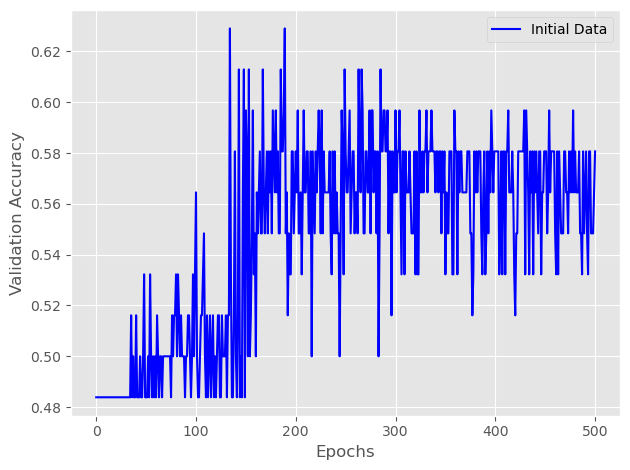

In [39]:
vals['epochs'] = 500
mlp = TLPBetterInitial(**vals)

mlp.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

y_hat = print_result(mlp,X_train,y_train,X_test,y_test,title="Initial Data",color="blue")

In [40]:
results['Predicted Stance 3'] = le1.inverse_transform(y_hat)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(results)

    Target Actual Stance Predicted Stance 1 Predicted Stance 2  \
0      0.5       AGAINST            AGAINST              FAVOR   
1      0.5         FAVOR              FAVOR              FAVOR   
2      0.5       AGAINST               NONE               NONE   
3      0.5         FAVOR              FAVOR              FAVOR   
4      0.5       AGAINST              FAVOR              FAVOR   
5      0.5         FAVOR              FAVOR              FAVOR   
6      0.5         FAVOR              FAVOR              FAVOR   
7      0.5       AGAINST              FAVOR              FAVOR   
8      0.5       AGAINST              FAVOR              FAVOR   
9      0.5         FAVOR              FAVOR              FAVOR   
10     0.5       AGAINST              FAVOR              FAVOR   
11     0.5         FAVOR            AGAINST            AGAINST   
12     0.5         FAVOR              FAVOR              FAVOR   
13     0.5       AGAINST              FAVOR              FAVOR   
14     0.5

In [41]:
results_for_print['Predicted Stance'] = results['Predicted Stance 3']
print_results(results_for_print)

F: 18,  56.25%
A: 18,  60.0%


In [42]:
print("Topic 1")
print_results(results_for_print[(results_for_print['Target'] == 0.0)])
#print("Topic 2")
#print_results(results_for_print[(results_for_print['Target'] == 0.25)])
print("Topic 3")
print_results(results_for_print[(results_for_print['Target'] == 0.5)])
#print("Topic 4")
#print_results(results_for_print[(results_for_print['Target'] == 0.75)])
print("Topic 5")
print_results(results_for_print[(results_for_print['Target'] == 1.0)])

Topic 1
F: 6,  54.54545454545454%
A: 5,  55.55555555555556%
Topic 3
F: 9,  90.0%
A: 3,  30.0%
Topic 5
F: 3,  27.27272727272727%
A: 10,  90.9090909090909%


In [43]:
from sklearn import metrics as mt

print(mt.confusion_matrix(y_test,y_hat))
print(mt.classification_report(y_test,y_hat))

[[18  8  4]
 [14 18  0]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        30
           1       0.69      0.56      0.62        32
           2       0.00      0.00      0.00         0

    accuracy                           0.58        62
   macro avg       0.42      0.39      0.40        62
weighted avg       0.63      0.58      0.60        62



/Users/caryslekander/opt/anaconda3/envs/python38env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summary

In [44]:
print("Logistic Regression 1")
results_for_print['Predicted Stance'] = results['Predicted Stance 1']
print_results(results_for_print)
print(mt.confusion_matrix(y_test, le1.transform(results['Predicted Stance 1'])))
print()
print("Logistic Regression 2")
results_for_print['Predicted Stance'] = results['Predicted Stance 2']
print_results(results_for_print)
print(mt.confusion_matrix(y_test, le1.transform(results['Predicted Stance 2'])))
print()
print("MLP")
results_for_print['Predicted Stance'] = results['Predicted Stance 3']
print_results(results_for_print)
print(mt.confusion_matrix(y_test, le1.transform(results['Predicted Stance 3'])))


Logistic Regression 1
F: 19,  59.375%
A: 18,  60.0%
[[18  8  4]
 [13 19  0]
 [ 0  0  0]]

Logistic Regression 2
F: 22,  68.75%
A: 10,  33.33333333333333%
[[10 14  6]
 [ 8 22  2]
 [ 0  0  0]]

MLP
F: 18,  56.25%
A: 18,  60.0%
[[18  8  4]
 [14 18  0]
 [ 0  0  0]]


# One GRU Model For Stance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import io
import json

## Getting Training Data

In [2]:
import numpy as np
import pandas as pd

tweets = []
with open('trainingdata-all-annotations.txt','r', encoding = 'iso-8859-1') as f:
    while True:
        line = f.readline()
        if not line:
            break
        tweets.append(line.split('\t'))
        
mat = np.array(tweets)
mat = np.delete(mat, 0, axis=0)

df_full = pd.DataFrame(mat, columns = ['ID','Target','Tweet','Stance','Opinion towards', 'Sentiment'])
df = df_full.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)

print(df)

                                                  Tweet   Stance
0     dear lord thank u for all of ur blessings forg...  AGAINST
1     Blessed are the peacemakers, for they shall be...  AGAINST
2     I am not conformed to this world. I am transfo...  AGAINST
3     Salah should be prayed with #focus and #unders...  AGAINST
4     And stay in your houses and do not display you...  AGAINST
...                                                 ...      ...
2809  There's a law protecting unborn eagles, but no...  AGAINST
2810  I am 1 in 3... I have had an abortion #Abortio...  AGAINST
2811  How dare you say my sexual preference is a cho...  AGAINST
2812  Equal rights for those 'born that way', no rig...  AGAINST
2813  #POTUS seals his legacy w/ 1/2 doz wins. The #...  AGAINST

[2814 rows x 2 columns]


In [3]:
totals = df['Stance'].value_counts()
totals

AGAINST    1342
NONE        741
FAVOR       731
Name: Stance, dtype: int64

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le1 = preprocessing.LabelEncoder()
le1.fit(df['Stance'])
df['Stance'] = le1.transform(df['Stance'])

In [5]:
max_words = 0
for i in df.Tweet:
    if len(i.split()) > max_words:
        max_words = len(i.split())
max_words

32

In [6]:
%%time
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_TOP_WORDS = None # use entire vocabulary!
MAX_ART_LEN = 40 # maximum and minimum number of words

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(df.Tweet)
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(df.Tweet)

word_index = tokenizer.word_index

X_train = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_train = df.Stance.astype(np.int32)

CPU times: user 1.45 s, sys: 235 ms, total: 1.69 s
Wall time: 1.97 s


In [7]:
y_train_ohe = keras.utils.to_categorical(y_train, 3)

In [8]:
%%time
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('/Users/caryslekander/Documents/School2022-2023/NLP/NLP-Project2/large_data/glove.6B/glove.6B.100d.txt', encoding="utf8")
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (9273, 100) 
 Total words found: 6635 
 Percentage: 71.55181710341853
CPU times: user 5.89 s, sys: 157 ms, total: 6.04 s
Wall time: 6.04 s


## Preparing Model

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, LSTM, GRU
from tensorflow.keras.layers import Embedding

In [10]:
# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

In [11]:
gru = Sequential()
gru.add(embedding_layer)
gru.add(GRU(100,dropout=0.2, recurrent_dropout=0.3))
gru.add(Dense(3, activation='sigmoid'))

print(gru.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           927300    
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 988,203
Trainable params: 60,903
Non-trainable params: 927,300
_________________________________________________________________
None


2023-05-05 12:17:48.066444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
gru.compile(loss='binary_crossentropy',
        optimizer='rmsprop',
        metrics=['accuracy', keras.metrics.Recall()])

In [13]:
history = gru.fit(X_train, y_train_ohe, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
44/44 [==============================] - 2s 25ms/step - loss: 0.6102 - accuracy: 0.4879 - recall: 0.2193
Epoch 2/100
44/44 [==============================] - 1s 25ms/step - loss: 0.5831 - accuracy: 0.5203 - recall: 0.2839
Epoch 3/100
44/44 [==============================] - 1s 25ms/step - loss: 0.5673 - accuracy: 0.5441 - recall: 0.3308
Epoch 4/100
44/44 [==============================] - 1s 25ms/step - loss: 0.5498 - accuracy: 0.5561 - recall: 0.3895
Epoch 5/100
44/44 [==============================] - 1s 24ms/step - loss: 0.5365 - accuracy: 0.5814 - recall: 0.4218
Epoch 6/100
44/44 [==============================] - 1s 25ms/step - loss: 0.5306 - accuracy: 0.5888 - recall: 0.4542
Epoch 7/100
44/44 [==============================] - 1s 25ms/step - loss: 0.5177 - accuracy: 0.5999 - recall: 0.4716
Epoch 8/100
44/44 [==============================] - 1s 25ms/step - loss: 0.5099 - accuracy: 0.6098 - recall: 0.4865
Epoch 9/100
44/44 [==============================] - 1s 25ms/ste

## Getting Testing Data

In [14]:
tweets = []
with open('testdata-taskA-all-annotations.txt','r', encoding = 'iso-8859-1') as f:
    while True:
        line = f.readline()
        if not line:
            break
        tweets.append(line.split('\t'))
        
mat = np.array(tweets)
mat = np.delete(mat, 0, axis=0)

df_testing_full = pd.DataFrame(mat, columns = ['ID','Target','Tweet','Stance','Opinion towards', 'Sentiment'])
df_testing = df_testing_full.drop(['ID','Opinion towards', 'Target','Sentiment'], axis=1)

print(df_testing)

                                                  Tweet   Stance
0     He who exalts himself shall      be humbled; a...  AGAINST
1     RT @prayerbullets: I remove Nehushtan -previou...  AGAINST
2     @Brainman365 @heidtjj @BenjaminLives I have so...  AGAINST
3     #God is utterly powerless without Human interv...  AGAINST
4     @David_Cameron   Miracles of #Multiculturalism...  AGAINST
...                                                 ...      ...
1244  @MetalheadMonty @tom_six I followed him before...     NONE
1245  For he who avenges blood remembers, he does no...  AGAINST
1246  Life is sacred on all levels. Abortion does no...  AGAINST
1247  @ravensymone U refer to "WE" which ="YOU" & a ...  AGAINST
1248  Al Robertson's mom #DuckDynasty  chose life as...  AGAINST

[1249 rows x 2 columns]


In [15]:
totals = df_testing['Stance'].value_counts()
totals

AGAINST    715
FAVOR      304
NONE       230
Name: Stance, dtype: int64

In [16]:
df_testing['Stance'] = le1.transform(df_testing['Stance'])

In [17]:
sequences = tokenizer.texts_to_sequences(df_testing.Tweet)

X_test = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_test = df_testing.Stance.astype(np.int32)
y_test_ohe = keras.utils.to_categorical(y_test, 3)

## Testing

In [18]:
scores = gru.evaluate(X_test, y_test_ohe, verbose=1)

40/40 [==============================] - 0s 5ms/step - loss: 0.9947 - accuracy: 0.5733 - recall: 0.5404


In [19]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

40/40 [==============================] - 0s 4ms/step


# One GRU Model For Sentiment

## Getting Training Data

In [20]:
df = df_full.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)

print(df)

                                                  Tweet   Sentiment
0     dear lord thank u for all of ur blessings forg...  POSITIVE\n
1     Blessed are the peacemakers, for they shall be...  POSITIVE\n
2     I am not conformed to this world. I am transfo...  POSITIVE\n
3     Salah should be prayed with #focus and #unders...  POSITIVE\n
4     And stay in your houses and do not display you...  NEGATIVE\n
...                                                 ...         ...
2809  There's a law protecting unborn eagles, but no...  NEGATIVE\n
2810  I am 1 in 3... I have had an abortion #Abortio...   NEITHER\n
2811  How dare you say my sexual preference is a cho...  NEGATIVE\n
2812  Equal rights for those 'born that way', no rig...  NEGATIVE\n
2813  #POTUS seals his legacy w/ 1/2 doz wins. The #...  NEGATIVE\n

[2814 rows x 2 columns]


In [21]:
le2 = preprocessing.LabelEncoder()
le2.fit(df['Sentiment'])
df['Sentiment'] = le2.transform(df['Sentiment'])

In [22]:
y_train = df.Sentiment.astype(np.int32)
y_train_ohe = keras.utils.to_categorical(y_train, 3)

## Fitting Model

In [23]:
history = gru.fit(X_train, y_train_ohe, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
44/44 [==============================] - 1s 27ms/step - loss: 1.0612 - accuracy: 0.5263 - recall: 0.4954
Epoch 2/100
44/44 [==============================] - 1s 27ms/step - loss: 0.5496 - accuracy: 0.6123 - recall: 0.5679
Epoch 3/100
44/44 [==============================] - 1s 28ms/step - loss: 0.4640 - accuracy: 0.6645 - recall: 0.6166
Epoch 4/100
44/44 [==============================] - 1s 27ms/step - loss: 0.4173 - accuracy: 0.7107 - recall: 0.6571
Epoch 5/100
44/44 [==============================] - 1s 27ms/step - loss: 0.4006 - accuracy: 0.7196 - recall: 0.6827
Epoch 6/100
44/44 [==============================] - 1s 27ms/step - loss: 0.3740 - accuracy: 0.7534 - recall: 0.7129
Epoch 7/100
44/44 [==============================] - 1s 27ms/step - loss: 0.3586 - accuracy: 0.7608 - recall: 0.7164
Epoch 8/100
44/44 [==============================] - 1s 27ms/step - loss: 0.3503 - accuracy: 0.7640 - recall: 0.7264
Epoch 9/100
44/44 [==============================] - 1s 27ms/ste

## Testing Data

In [24]:
df_testing = df_testing_full.drop(['ID','Opinion towards', 'Target','Stance'], axis=1)

print(df_testing)

                                                  Tweet   Sentiment
0     He who exalts himself shall      be humbled; a...  POSITIVE\n
1     RT @prayerbullets: I remove Nehushtan -previou...   NEITHER\n
2     @Brainman365 @heidtjj @BenjaminLives I have so...  POSITIVE\n
3     #God is utterly powerless without Human interv...  NEGATIVE\n
4     @David_Cameron   Miracles of #Multiculturalism...  NEGATIVE\n
...                                                 ...         ...
1244  @MetalheadMonty @tom_six I followed him before...  NEGATIVE\n
1245  For he who avenges blood remembers, he does no...   NEITHER\n
1246  Life is sacred on all levels. Abortion does no...   NEITHER\n
1247  @ravensymone U refer to "WE" which ="YOU" & a ...  NEGATIVE\n
1248  Al Robertson's mom #DuckDynasty  chose life as...   NEITHER\n

[1249 rows x 2 columns]


In [25]:
df_testing['Sentiment'] = le2.transform(df_testing['Sentiment'])
y_test = df_testing.Sentiment.astype(np.int32)
y_test_ohe = keras.utils.to_categorical(y_test, 3)

## Testing

In [26]:
scores = gru.evaluate(X_test, y_test_ohe, verbose=1)

40/40 [==============================] - 0s 5ms/step - loss: 0.8660 - accuracy: 0.7318 - recall: 0.7166


In [27]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

40/40 [==============================] - 0s 5ms/step
[2 2 2 ... 0 0 0]


# Separate Models For Each Target

## Hillary Clinton

In [28]:
df = df_full[df_full['Target'] == 'Hillary Clinton']
df_stance = df.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_sentiment = df.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)


In [29]:
sequences = tokenizer.texts_to_sequences(df.Tweet)

df_stance['Stance'] = le1.transform(df_stance['Stance'])
df_sentiment['Sentiment'] = le2.transform(df_sentiment['Sentiment'])
X_train = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_train_stance = df_stance.Stance.astype(np.int32)
y_train_stance_ohe = keras.utils.to_categorical(y_train_stance, 3)
y_train_sentiment = df_sentiment.Sentiment.astype(np.int32)
y_train_sentiment_ohe = keras.utils.to_categorical(y_train_sentiment, 3)

In [30]:
df_testing = df_testing_full[df_testing_full['Target'] == 'Hillary Clinton']
df_testing_stance = df_testing.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_testing_sentiment = df_testing.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)

In [31]:
sequences = tokenizer.texts_to_sequences(df_testing.Tweet)
df_testing_stance['Stance'] = le1.transform(df_testing_stance['Stance'])
df_testing_sentiment['Sentiment'] = le2.transform(df_testing_sentiment['Sentiment'])

X_test = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_test_stance = df_testing_stance.Stance.astype(np.int32)
y_test_stance_ohe = keras.utils.to_categorical(y_test_stance, 3)
y_test_sentiment = df_testing_sentiment.Sentiment.astype(np.int32)
y_test_sentiment_ohe = keras.utils.to_categorical(y_test_sentiment, 3)

### Stance

In [32]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 32ms/step - loss: 1.6146 - accuracy: 0.5258 - recall: 0.5164
Epoch 2/100
10/10 [==============================] - 0s 32ms/step - loss: 1.0502 - accuracy: 0.5649 - recall: 0.5415
Epoch 3/100
10/10 [==============================] - 0s 30ms/step - loss: 0.8424 - accuracy: 0.5790 - recall: 0.5336
Epoch 4/100
10/10 [==============================] - 0s 28ms/step - loss: 0.6547 - accuracy: 0.6291 - recall: 0.5649
Epoch 5/100
10/10 [==============================] - 0s 28ms/step - loss: 0.6000 - accuracy: 0.6557 - recall: 0.5978
Epoch 6/100
10/10 [==============================] - 0s 28ms/step - loss: 0.5183 - accuracy: 0.6823 - recall: 0.6385
Epoch 7/100
10/10 [==============================] - 0s 28ms/step - loss: 0.5018 - accuracy: 0.6901 - recall: 0.6463
Epoch 8/100
10/10 [==============================] - 0s 28ms/step - loss: 0.4541 - accuracy: 0.7027 - recall: 0.6526
Epoch 9/100
10/10 [==============================] - 0s 28ms/ste

In [33]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

10/10 [==============================] - 0s 5ms/step - loss: 1.3525 - accuracy: 0.5763 - recall: 0.5559


In [34]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

10/10 [==============================] - 0s 5ms/step


### Sentiment

In [35]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0154 - accuracy: 0.9953 - recall: 0.9906
Epoch 2/100
10/10 [==============================] - 0s 30ms/step - loss: 0.0209 - accuracy: 0.9906 - recall: 0.9844
Epoch 3/100
10/10 [==============================] - 0s 29ms/step - loss: 0.0238 - accuracy: 0.9922 - recall: 0.9828
Epoch 4/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0211 - accuracy: 0.9906 - recall: 0.9875
Epoch 5/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0126 - accuracy: 0.9922 - recall: 0.9937
Epoch 6/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0073 - accuracy: 0.9984 - recall: 0.9984
Epoch 7/100
10/10 [==============================] - 0s 30ms/step - loss: 0.0115 - accuracy: 0.9969 - recall: 0.9937
Epoch 8/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0151 - accuracy: 0.9937 - recall: 0.9937
Epoch 9/100
10/10 [==============================] - 0s 28ms/ste

In [36]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

10/10 [==============================] - 0s 5ms/step - loss: 1.5479 - accuracy: 0.5559 - recall: 0.5322


In [37]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

10/10 [==============================] - 0s 5ms/step


## Climate Change is a Real Concern

In [38]:
df = df_full[df_full['Target'] == 'Climate Change is a Real Concern']
df_stance = df.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_sentiment = df.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)


In [39]:
sequences = tokenizer.texts_to_sequences(df.Tweet)

df_stance['Stance'] = le1.transform(df_stance['Stance'])
df_sentiment['Sentiment'] = le2.transform(df_sentiment['Sentiment'])
X_train = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_train_stance = df_stance.Stance.astype(np.int32)
y_train_stance_ohe = keras.utils.to_categorical(y_train_stance, 3)
y_train_sentiment = df_sentiment.Sentiment.astype(np.int32)
y_train_sentiment_ohe = keras.utils.to_categorical(y_train_sentiment, 3)

In [40]:
df_testing = df_testing_full[df_testing_full['Target'] == 'Climate Change is a Real Concern']
df_testing_stance = df_testing.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_testing_sentiment = df_testing.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)

In [41]:
sequences = tokenizer.texts_to_sequences(df_testing.Tweet)
df_testing_stance['Stance'] = le1.transform(df_testing_stance['Stance'])
df_testing_sentiment['Sentiment'] = le2.transform(df_testing_sentiment['Sentiment'])

X_test = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_test_stance = df_testing_stance.Stance.astype(np.int32)
y_test_stance_ohe = keras.utils.to_categorical(y_test_stance, 3)
y_test_sentiment = df_testing_sentiment.Sentiment.astype(np.int32)
y_test_sentiment_ohe = keras.utils.to_categorical(y_test_sentiment, 3)

In [42]:
df = df_full[df_full['Target'] == 'Climate Change is a Real Concern']
df_stance = df.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_sentiment = df.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)


### Stance

In [43]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 27ms/step - loss: 1.5155 - accuracy: 0.5342 - recall: 0.5063
Epoch 2/100
7/7 [==============================] - 0s 27ms/step - loss: 0.8044 - accuracy: 0.6506 - recall: 0.6633
Epoch 3/100
7/7 [==============================] - 0s 27ms/step - loss: 0.6496 - accuracy: 0.6962 - recall: 0.6861
Epoch 4/100
7/7 [==============================] - 0s 27ms/step - loss: 0.4331 - accuracy: 0.7646 - recall: 0.7722
Epoch 5/100
7/7 [==============================] - 0s 28ms/step - loss: 0.4503 - accuracy: 0.7975 - recall: 0.7772
Epoch 6/100
7/7 [==============================] - 0s 28ms/step - loss: 0.4352 - accuracy: 0.8000 - recall: 0.8000
Epoch 7/100
7/7 [==============================] - 0s 27ms/step - loss: 0.3600 - accuracy: 0.8076 - recall: 0.7899
Epoch 8/100
7/7 [==============================] - 0s 27ms/step - loss: 0.2918 - accuracy: 0.8228 - recall: 0.8051
Epoch 9/100
7/7 [==============================] - 0s 27ms/step - loss: 0.3131 -

In [44]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

6/6 [==============================] - 0s 5ms/step - loss: 1.0892 - accuracy: 0.7811 - recall: 0.7633


In [45]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

6/6 [==============================] - 0s 5ms/step


### Sentiment

In [46]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0080 - accuracy: 0.9975 - recall: 0.9975
Epoch 2/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0023 - accuracy: 1.0000 - recall: 1.0000
Epoch 3/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0019 - accuracy: 1.0000 - recall: 1.0000
Epoch 4/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0023 - accuracy: 1.0000 - recall: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0085 - accuracy: 0.9949 - recall: 0.9949
Epoch 6/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0122 - accuracy: 0.9949 - recall: 0.9949
Epoch 7/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0038 - accuracy: 0.9975 - recall: 0.9975
Epoch 8/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0049 - accuracy: 0.9949 - recall: 0.9949
Epoch 9/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0013 -

In [47]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

6/6 [==============================] - 0s 5ms/step - loss: 1.3986 - accuracy: 0.7515 - recall: 0.7396


In [48]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

6/6 [==============================] - 0s 5ms/step


## Feminist Movement

In [49]:
df = df_full[df_full['Target'] == 'Feminist Movement']
df_stance = df.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_sentiment = df.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)


In [50]:
sequences = tokenizer.texts_to_sequences(df.Tweet)

df_stance['Stance'] = le1.transform(df_stance['Stance'])
df_sentiment['Sentiment'] = le2.transform(df_sentiment['Sentiment'])
X_train = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_train_stance = df_stance.Stance.astype(np.int32)
y_train_stance_ohe = keras.utils.to_categorical(y_train_stance, 3)
y_train_sentiment = df_sentiment.Sentiment.astype(np.int32)
y_train_sentiment_ohe = keras.utils.to_categorical(y_train_sentiment, 3)

In [51]:
df_testing = df_testing_full[df_testing_full['Target'] == 'Hillary Clinton']
df_testing_stance = df_testing.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_testing_sentiment = df_testing.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)

In [52]:
sequences = tokenizer.texts_to_sequences(df_testing.Tweet)
df_testing_stance['Stance'] = le1.transform(df_testing_stance['Stance'])
df_testing_sentiment['Sentiment'] = le2.transform(df_testing_sentiment['Sentiment'])

X_test = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_test_stance = df_testing_stance.Stance.astype(np.int32)
y_test_stance_ohe = keras.utils.to_categorical(y_test_stance, 3)
y_test_sentiment = df_testing_sentiment.Sentiment.astype(np.int32)
y_test_sentiment_ohe = keras.utils.to_categorical(y_test_sentiment, 3)

### Stance

In [53]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 0s 27ms/step - loss: 1.3563 - accuracy: 0.5723 - recall: 0.5497
Epoch 2/100
11/11 [==============================] - 0s 28ms/step - loss: 0.8423 - accuracy: 0.6627 - recall: 0.6325
Epoch 3/100
11/11 [==============================] - 0s 27ms/step - loss: 0.7046 - accuracy: 0.6747 - recall: 0.6506
Epoch 4/100
11/11 [==============================] - 0s 28ms/step - loss: 0.6038 - accuracy: 0.6988 - recall: 0.6566
Epoch 5/100
11/11 [==============================] - 0s 27ms/step - loss: 0.5329 - accuracy: 0.7485 - recall: 0.7063
Epoch 6/100
11/11 [==============================] - 0s 27ms/step - loss: 0.5221 - accuracy: 0.7410 - recall: 0.6973
Epoch 7/100
11/11 [==============================] - 0s 27ms/step - loss: 0.4131 - accuracy: 0.7681 - recall: 0.7214
Epoch 8/100
11/11 [==============================] - 0s 27ms/step - loss: 0.3923 - accuracy: 0.7801 - recall: 0.7440
Epoch 9/100
11/11 [==============================] - 0s 28ms/ste

In [54]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

10/10 [==============================] - 0s 5ms/step - loss: 1.4981 - accuracy: 0.5322 - recall: 0.5051


In [55]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

10/10 [==============================] - 0s 5ms/step


### Sentiment

In [56]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0183 - accuracy: 0.9895 - recall: 0.9925
Epoch 2/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0242 - accuracy: 0.9849 - recall: 0.9849
Epoch 3/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0195 - accuracy: 0.9895 - recall: 0.9925
Epoch 4/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0150 - accuracy: 0.9925 - recall: 0.9910
Epoch 5/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0153 - accuracy: 0.9925 - recall: 0.9925
Epoch 6/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0179 - accuracy: 0.9940 - recall: 0.9925
Epoch 7/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0100 - accuracy: 0.9970 - recall: 0.9955
Epoch 8/100
11/11 [==============================] - 0s 28ms/step - loss: 0.0157 - accuracy: 0.9940 - recall: 0.9925
Epoch 9/100
11/11 [==============================] - 0s 29ms/ste

In [57]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

10/10 [==============================] - 0s 5ms/step - loss: 1.7708 - accuracy: 0.5186 - recall: 0.5119


In [58]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

10/10 [==============================] - 0s 5ms/step


## Legalization of Abortion

In [59]:
df = df_full[df_full['Target'] == 'Legalization of Abortion']
df_stance = df.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_sentiment = df.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)


In [60]:
sequences = tokenizer.texts_to_sequences(df.Tweet)

df_stance['Stance'] = le1.transform(df_stance['Stance'])
df_sentiment['Sentiment'] = le2.transform(df_sentiment['Sentiment'])
X_train = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_train_stance = df_stance.Stance.astype(np.int32)
y_train_stance_ohe = keras.utils.to_categorical(y_train_stance, 3)
y_train_sentiment = df_sentiment.Sentiment.astype(np.int32)
y_train_sentiment_ohe = keras.utils.to_categorical(y_train_sentiment, 3)

In [61]:
df_testing = df_testing_full[df_testing_full['Target'] == 'Legalization of Abortion']
df_testing_stance = df_testing.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_testing_sentiment = df_testing.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)

In [62]:
sequences = tokenizer.texts_to_sequences(df_testing.Tweet)
df_testing_stance['Stance'] = le1.transform(df_testing_stance['Stance'])
df_testing_sentiment['Sentiment'] = le2.transform(df_testing_sentiment['Sentiment'])

X_test = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_test_stance = df_testing_stance.Stance.astype(np.int32)
y_test_stance_ohe = keras.utils.to_categorical(y_test_stance, 3)
y_test_sentiment = df_testing_sentiment.Sentiment.astype(np.int32)
y_test_sentiment_ohe = keras.utils.to_categorical(y_test_sentiment, 3)

### Stance

In [63]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 30ms/step - loss: 1.1382 - accuracy: 0.6335 - recall: 0.6070
Epoch 2/100
10/10 [==============================] - 0s 30ms/step - loss: 0.7486 - accuracy: 0.7015 - recall: 0.6733
Epoch 3/100
10/10 [==============================] - 0s 31ms/step - loss: 0.6760 - accuracy: 0.7114 - recall: 0.6667
Epoch 4/100
10/10 [==============================] - 0s 35ms/step - loss: 0.5834 - accuracy: 0.7081 - recall: 0.6965
Epoch 5/100
10/10 [==============================] - 0s 49ms/step - loss: 0.4768 - accuracy: 0.7512 - recall: 0.7048
Epoch 6/100
10/10 [==============================] - 0s 41ms/step - loss: 0.4617 - accuracy: 0.7761 - recall: 0.7413
Epoch 7/100
10/10 [==============================] - 0s 30ms/step - loss: 0.4269 - accuracy: 0.7711 - recall: 0.7446
Epoch 8/100
10/10 [==============================] - 0s 30ms/step - loss: 0.3580 - accuracy: 0.8027 - recall: 0.7612
Epoch 9/100
10/10 [==============================] - 0s 31ms/ste

In [64]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

9/9 [==============================] - 0s 5ms/step - loss: 1.5364 - accuracy: 0.6143 - recall: 0.6000


In [65]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

9/9 [==============================] - 0s 4ms/step


### Sentiment

In [66]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0072 - accuracy: 0.9967 - recall: 0.9950
Epoch 2/100
10/10 [==============================] - 0s 30ms/step - loss: 0.0105 - accuracy: 0.9967 - recall: 0.9950
Epoch 3/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0117 - accuracy: 0.9950 - recall: 0.9967
Epoch 4/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0073 - accuracy: 0.9983 - recall: 0.9983
Epoch 5/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0119 - accuracy: 0.9917 - recall: 0.9900
Epoch 6/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0097 - accuracy: 0.9950 - recall: 0.9934
Epoch 7/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0119 - accuracy: 0.9934 - recall: 0.9934
Epoch 8/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0178 - accuracy: 0.9934 - recall: 0.9917
Epoch 9/100
10/10 [==============================] - 0s 27ms/ste

In [67]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

9/9 [==============================] - 0s 5ms/step - loss: 1.9330 - accuracy: 0.5821 - recall: 0.5786


In [68]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

9/9 [==============================] - 0s 4ms/step


## Atheism

In [69]:
df = df_full[df_full['Target'] == 'Atheism']
df_stance = df.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_sentiment = df.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)


In [70]:
sequences = tokenizer.texts_to_sequences(df.Tweet)

df_stance['Stance'] = le1.transform(df_stance['Stance'])
df_sentiment['Sentiment'] = le2.transform(df_sentiment['Sentiment'])
X_train = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_train_stance = df_stance.Stance.astype(np.int32)
y_train_stance_ohe = keras.utils.to_categorical(y_train_stance, 3)
y_train_sentiment = df_sentiment.Sentiment.astype(np.int32)
y_train_sentiment_ohe = keras.utils.to_categorical(y_train_sentiment, 3)

In [71]:
df_testing = df_testing_full[df_testing_full['Target'] == 'Atheism']
df_testing_stance = df_testing.drop(['ID','Opinion towards', 'Sentiment', 'Target'], axis=1)
df_testing_sentiment = df_testing.drop(['ID','Opinion towards', 'Stance', 'Target'], axis=1)

In [72]:
sequences = tokenizer.texts_to_sequences(df_testing.Tweet)
df_testing_stance['Stance'] = le1.transform(df_testing_stance['Stance'])
df_testing_sentiment['Sentiment'] = le2.transform(df_testing_sentiment['Sentiment'])

X_test = pad_sequences(sequences, maxlen=MAX_ART_LEN)
y_test_stance = df_testing_stance.Stance.astype(np.int32)
y_test_stance_ohe = keras.utils.to_categorical(y_test_stance, 3)
y_test_sentiment = df_testing_sentiment.Sentiment.astype(np.int32)
y_test_sentiment_ohe = keras.utils.to_categorical(y_test_sentiment, 3)

### Stance

In [73]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 26ms/step - loss: 1.2955 - accuracy: 0.5887 - recall: 0.5634
Epoch 2/100
9/9 [==============================] - 0s 27ms/step - loss: 0.9204 - accuracy: 0.6511 - recall: 0.6101
Epoch 3/100
9/9 [==============================] - 0s 26ms/step - loss: 0.7235 - accuracy: 0.7018 - recall: 0.6725
Epoch 4/100
9/9 [==============================] - 0s 27ms/step - loss: 0.6943 - accuracy: 0.7018 - recall: 0.6803
Epoch 5/100
9/9 [==============================] - 0s 26ms/step - loss: 0.5498 - accuracy: 0.7368 - recall: 0.7076
Epoch 6/100
9/9 [==============================] - 0s 27ms/step - loss: 0.4910 - accuracy: 0.7524 - recall: 0.7154
Epoch 7/100
9/9 [==============================] - 0s 30ms/step - loss: 0.5041 - accuracy: 0.7349 - recall: 0.7096
Epoch 8/100
9/9 [==============================] - 0s 27ms/step - loss: 0.4417 - accuracy: 0.7758 - recall: 0.7524
Epoch 9/100
9/9 [==============================] - 0s 26ms/step - loss: 0.4504 -

In [74]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

7/7 [==============================] - 0s 5ms/step - loss: 0.9392 - accuracy: 0.7227 - recall: 0.7136


In [75]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 5ms/step


### Sentiment

In [76]:
history = gru.fit(X_train, y_train_stance_ohe, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0111 - accuracy: 0.9922 - recall: 0.9903
Epoch 2/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0102 - accuracy: 0.9942 - recall: 0.9961
Epoch 3/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0097 - accuracy: 0.9961 - recall: 0.9961
Epoch 4/100
9/9 [==============================] - 0s 30ms/step - loss: 0.0100 - accuracy: 0.9981 - recall: 0.9981
Epoch 5/100
9/9 [==============================] - 0s 29ms/step - loss: 0.0085 - accuracy: 0.9942 - recall: 0.9942
Epoch 6/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0144 - accuracy: 0.9903 - recall: 0.9922
Epoch 7/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0122 - accuracy: 0.9903 - recall: 0.9903
Epoch 8/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0067 - accuracy: 0.9961 - recall: 0.9961
Epoch 9/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0102 -

In [77]:
scores = gru.evaluate(X_test, y_test_stance_ohe, verbose=1)

7/7 [==============================] - 0s 5ms/step - loss: 1.1632 - accuracy: 0.7409 - recall: 0.7409


In [78]:
y_pred = gru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 5ms/step


In [ ]:
import warnings
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()